In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob
from pprint import pprint



In [10]:
path=glob.glob(os.path.join('MURA-v1.1','*','*','*', '*','*.png'))
pprint(path)


['MURA-v1.1\\train\\XR_ELBOW\\patient00011\\study1_negative\\image1.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00011\\study1_negative\\image2.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00011\\study1_negative\\image3.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00016\\study1_positive\\image1.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00016\\study1_positive\\image2.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00016\\study1_positive\\image3.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00026\\study1_negative\\image1.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00026\\study1_negative\\image2.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00026\\study1_negative\\image3.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00031\\study1_negative\\image1.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00031\\study1_negative\\image2.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00034\\study1_positive\\image1.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient00034\\study1_positive\\image2.png',
 'MURA-v1.1\\train\\XR_ELBOW\\patient0

We try to concatenate all the info about the images in one dataset
We use the character '\\' because one '\' is the escape and the other separates the subfolders in our OS (Windows). if we worked in linux we would use the character '/'
THere are two studies :study 1 and study 2

In [3]:
everythingScans_df=pd.DataFrame(dict(path=path))
everythingScans_df['Split']=everythingScans_df['path'].map(lambda x:x.split('\\')[1])
everythingScans_df['Bone']=everythingScans_df['path'].map(lambda x:x.split('\\')[2])
everythingScans_df['Patient']=everythingScans_df['path'].map(lambda x:x.split('\\')[3])
everythingScans_df['FolderName']=everythingScans_df['path'].map(lambda x:x.split('\\')[4])
everythingScans_df['Study']=everythingScans_df['path'].map(lambda x:x.split('\\')[4].split('_')[0])
everythingScans_df['Label']=everythingScans_df['path'].map(lambda x:x.split('\\')[4].split('_')[1])
everythingScans_df.sample(10)

path  Split         Bone  \
39814  MURA-v1.1\valid\XR_WRIST\patient11330\study2_n...  valid     XR_WRIST   
9190   MURA-v1.1\train\XR_FINGER\patient04554\study1_...  train    XR_FINGER   
26753  MURA-v1.1\train\XR_SHOULDER\patient02596\study...  train  XR_SHOULDER   
12019  MURA-v1.1\train\XR_HAND\patient01067\study1_ne...  train      XR_HAND   
17981  MURA-v1.1\train\XR_HUMERUS\patient02896\study1...  train   XR_HUMERUS   
24852  MURA-v1.1\train\XR_SHOULDER\patient01991\study...  train  XR_SHOULDER   
24321  MURA-v1.1\train\XR_SHOULDER\patient01824\study...  train  XR_SHOULDER   
24022  MURA-v1.1\train\XR_SHOULDER\patient01732\study...  train  XR_SHOULDER   
11834  MURA-v1.1\train\XR_FOREARM\patient09720\study1...  train   XR_FOREARM   
34537  MURA-v1.1\train\XR_WRIST\patient08333\study1_n...  train     XR_WRIST   

            Patient       FolderName   Study     Label  
39814  patient11330  study2_negative  study2  negative  
9190   patient04554  study1_negative  study1  negative  
26753  patient02596  study1_negative  study1  negative  
12019  patient01067  study1_negative  study1  negative  
17981  patient02896  study1_positive  study1  positive  
24852  patient01991  study1_negative  study1  negative  
24321  patient01824  study1_negative  study1  negative  
24022  patient01732  study1_negative  study1  negative  
11834  patient09720  study1_negative  study1  negative  
34537  patient08333  study1_negative  study1  negative

We check if some data is missing

In [4]:
print(everythingScans_df.isnull().values.any())
a=[0 if (x=='positive' or x=='negative') else 1 for x in everythingScans_df['Label'] ]
print(sum(a))

False
0


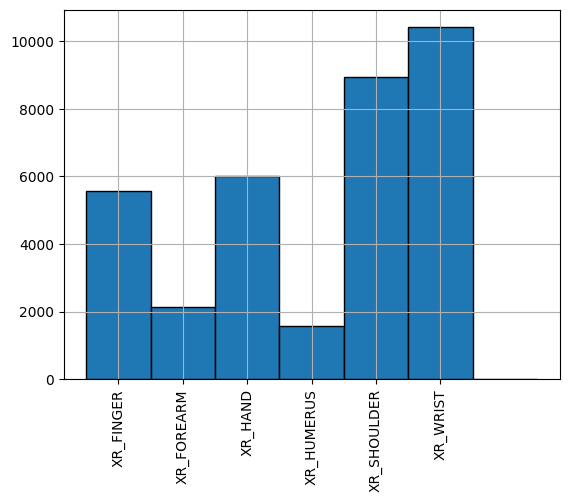

In [5]:

everythingScans_df['Bone'].hist(bins=range(1,9),rwidth=1, align='left',edgecolor='black')
plt.xticks(rotation=90)
plt.show()

# Explore some examples of images
When groupping by two values we need to define how the values will be combined.
get combinations of pics with same label and bone then choose one randomly 

In [9]:
onePairPic_df=everythingScans_df.groupby(['Label','Bone']).apply(lambda x:x.sample(1))
onePairPic_df.reset_index(drop=True)

path  Split         Bone  \
0   MURA-v1.1\train\XR_ELBOW\patient06055\study1_n...  train     XR_ELBOW   
1   MURA-v1.1\train\XR_FINGER\patient04247\study1_...  train    XR_FINGER   
2   MURA-v1.1\train\XR_FOREARM\patient09477\study1...  train   XR_FOREARM   
3   MURA-v1.1\train\XR_HAND\patient05480\study1_ne...  train      XR_HAND   
4   MURA-v1.1\train\XR_HUMERUS\patient03103\study1...  train   XR_HUMERUS   
5   MURA-v1.1\train\XR_SHOULDER\patient02601\study...  train  XR_SHOULDER   
6   MURA-v1.1\train\XR_WRIST\patient07538\study1_n...  train     XR_WRIST   
7   MURA-v1.1\train\XR_ELBOW\patient05412\study1_p...  train     XR_ELBOW   
8   MURA-v1.1\train\XR_FINGER\patient03610\study1_...  train    XR_FINGER   
9   MURA-v1.1\train\XR_FOREARM\patient09286\study1...  train   XR_FOREARM   
10  MURA-v1.1\train\XR_HAND\patient10119\study1_po...  train      XR_HAND   
11  MURA-v1.1\train\XR_HUMERUS\patient02756\study1...  train   XR_HUMERUS   
12  MURA-v1.1\train\XR_SHOULDER\patient01264\study...  train  XR_SHOULDER   
13  MURA-v1.1\train\XR_WRIST\patient07321\study1_p...  train     XR_WRIST   

         Patient       FolderName   Study     Label  
0   patient06055  study1_negative  study1  negative  
1   patient04247  study1_negative  study1  negative  
2   patient09477  study1_negative  study1  negative  
3   patient05480  study1_negative  study1  negative  
4   patient03103  study1_negative  study1  negative  
5   patient02601  study1_negative  study1  negative  
6   patient07538  study1_negative  study1  negative  
7   patient05412  study1_positive  study1  positive  
8   patient03610  study1_positive  study1  positive  
9   patient09286  study1_positive  study1  positive  
10  patient10119  study1_positive  study1  positive  
11  patient02756  study1_positive  study1  positive  
12  patient01264  study1_positive  study1  positive  
13  patient07321  study1_positive  study1  positive

In [ ]:
from skimage.io import imread
# enough cells to show all data
fig,axis=plt.subplots(4,onePairPic_df.shape[0]//3)


print(onePairPic_df.loc['path'])

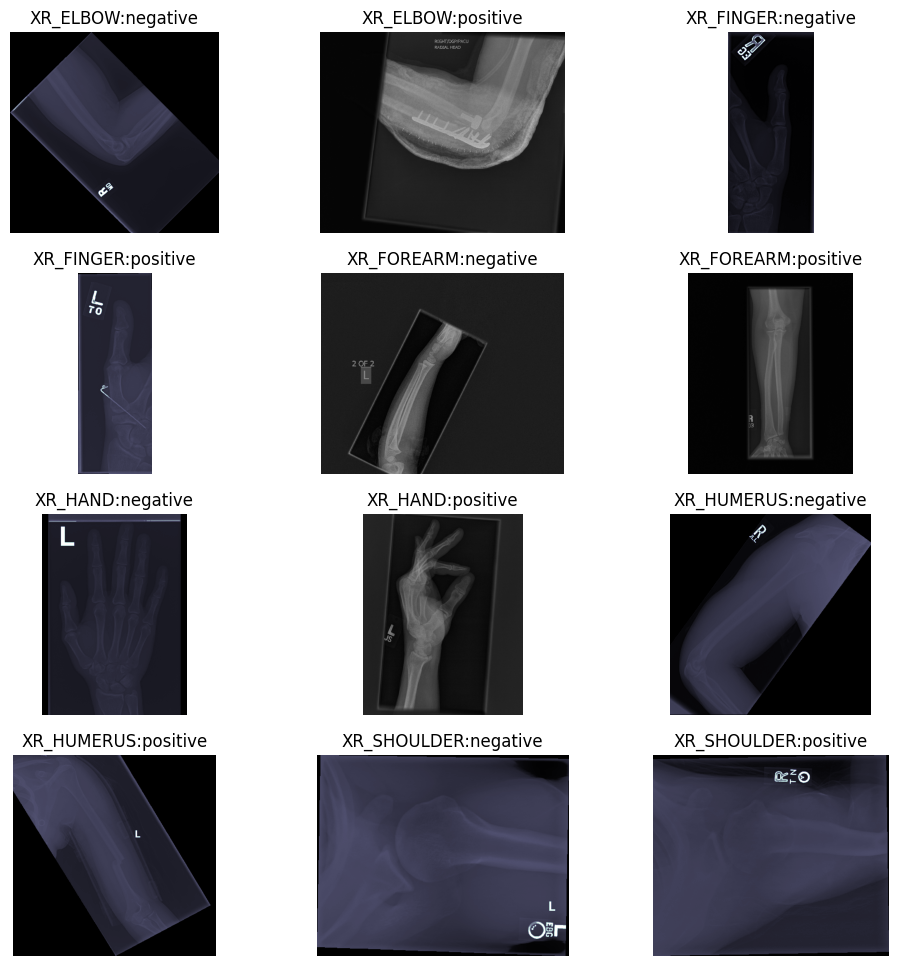

In [13]:
sub_df = everythingScans_df.groupby(['Bone', 'Label']).apply(lambda x: x.sample(1)).reset_index(drop = True)
fig, (m_axs) = plt.subplots(4, sub_df.shape[0]//4, figsize = (12, 12))
for c_ax, (_, c_row) in zip(m_axs.flatten(), sub_df.iterrows()):
    c_ax.imshow(imread(c_row['path']), cmap = 'bone')
    c_ax.axis('off')
    c_ax.set_title('{Bone}:{Label}'.format(**c_row))